In [1]:
import numpy as np
from matplotlib import pyplot as plt

# 1.Gradient

Let f be defined on multiple variables.
$$f(x,y,z)$$

With the nabla operator $$ \nabla = \begin{pmatrix}\frac{\partial}{\partial x}\\\frac{\partial}{\partial y}\\\frac{\partial}{\partial z}\end{pmatrix}$$ we can calculate:
- gradient $$ \nabla f(x,y,z) = \begin{pmatrix}\frac{\partial}{\partial x}f(x,y,z)\\\frac{\partial}{\partial y}f(x,y,z)\\\frac{\partial}{\partial z}f(x,y,z)\end{pmatrix}$$

### Example

$$
f(\vec{r})=f(x,y,z) = e^{x^3-y^6}
$$

In [2]:
def f(r):
    return np.exp(-r[0]**2-r[1]**6)

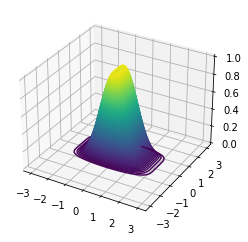

In [3]:
xGrad, yGrad = np.meshgrid(np.linspace(-3,3,301),np.linspace(-3,3,301))
zGrad = f( np.array([ xGrad, yGrad ]) )

plotproj = plt.axes(projection='3d')
plotproj.contour3D(xGrad,yGrad,zGrad,150)

In [4]:
def partialX(f,r,h,vector=0,index=0):
    x,y,z=r
    if vector==1:
        return (f(np.array([x+h,y,z]))[index]-f(np.array([x-h,y,z]))[index])/(2*h)
    else:
        return (f(np.array([x+h,y,z]))-f(np.array([x-h,y,z])))/(2*h)

In [5]:
def partialY(f,r,h,vector=0,index=0):
    x,y,z=r
    if vector==1:
        return (f(np.array([x,y+h,z]))[index]-f(np.array([x,y-h,z]))[index])/(2*h)
    else:
        return (f(np.array([x,y+h,z]))-f(np.array([x,y-h,z])))/(2*h)

In [6]:
def partialZ(f,r,h,vector=0,index=0):
    x,y,z=r
    if vector==1:
        return (f(np.array([x,y,z+h]))[index]-f(np.array([x,y,z-h]))[index])/(2*h)
    else:
        return (f(np.array([x,y,z+h]))-f(np.array([x,y,z-h])))/(2*h)

In [7]:
def gradient(f,r,h):
    x,y,z=r
    partialx=partialX(f,r,h)
    partialy=partialY(f,r,h)
    partialz=partialZ(f,r,h)
    return np.array([partialx,partialy,partialz])

In [8]:
r = np.array([0.5,-1.2,-8])
h = 0.0001

grad=gradient(f,r,h)
grad

array([-0.03932149,  0.5870668 ,  0.        ])

- analytical solution 

$$ \nabla f(x,y,z) = \begin{pmatrix}-2x e^{-x^2-y^6}\\-6y^5 e^{-x^2-y^6}\\0\end{pmatrix} $$

In [9]:
analytical=np.array([-2*r[0]*np.exp(-r[0]**2 -r[1]**6),-6*r[1]**5 * np.exp(-r[0]**2 - r[1]**6),0])
analytical

array([-0.03932149,  0.58706675,  0.        ])

In [10]:
Error=analytical-grad
Error #approximately zero

array([-3.27704169e-10, -4.90858749e-08,  0.00000000e+00])

# 2. Divergence and Curl

Dealing with vector fields:

$$ \vec{g}(x,y,z)=\begin{pmatrix}g_x(x,y,z)\\g_y(x,y,z)\\g_z(x,y,z)\end{pmatrix}$$


- curl $$\nabla\times \vec{g}(x,y,z) = \begin{pmatrix}
\frac{\partial}{\partial y}g_z(x,y,z) - \frac{\partial}{\partial z}g_y(x,y,z)\\
\frac{\partial}{\partial z}g_x(x,y,z) - \frac{\partial}{\partial x}g_z(x,y,z)\\
\frac{\partial}{\partial x}g_y(x,y,z) - \frac{\partial}{\partial y}g_x(x,y,z)\\
\end{pmatrix}$$

- divergence $$\nabla\cdot \vec{g}(x,y,z) = \frac{\partial}{\partial x}g_x(x,y,z)+\frac{\partial}{\partial y}g_y(x,y,z)+\frac{\partial}{\partial z}g_z(x,y,z)$$

### Example


$$
\vec{g}(\vec{r})=\frac{\vec{r}}{r}=\begin{pmatrix}x/\sqrt{x^2+y^2+z^2}\\y/\sqrt{x^2+y^2+z^2}\\z/\sqrt{x^2+y^2+z^2}\end{pmatrix}
$$

In [11]:
def g(r):
    return r/np.linalg.norm(r)

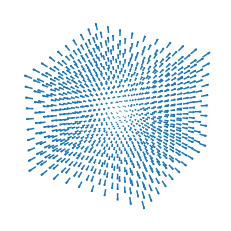

In [12]:
xVector, yVector, zVector = np.meshgrid(np.linspace(-2,2,10),np.linspace(-2,2,10),np.linspace(-2,2,10))
values = g( np.array([ xVector, yVector, zVector ]) )

arrowplot = plt.axes(projection='3d')
arrowplot.axis(False)

scale=6
arrowplot.quiver(
    xVector, yVector, zVector,
    values[0]*scale,values[1]*scale,values[2]*scale
)

### Curl

In [13]:
def curl(g,r,h):
    gZpartialY=partialY(g,r,h,1,2)
    gYpartialZ=partialZ(g,r,h,1,1)
    gXpartialZ=partialZ(g,r,h,1,0)
    gZpartialX=partialX(g,r,h,1,2)
    gYPartialX=partialX(g,r,h,1,1)
    gXpartialY=partialY(g,r,h,1,0)
    
    return np.array([gZpartialY-gYpartialZ,gXpartialZ-gZpartialX,gYPartialX-gXpartialY])

In [14]:
cur=curl(g,r,h)
cur

array([ 6.80011603e-12,  3.08780779e-12, -2.08166817e-13])

- analytical solution $ \nabla \times \vec{g}(\vec{r}) = 0 $

### divergence

In [15]:
def divergence(g,r,h):
    gXpartialX=partialX(g,r,h,1,0)
    gYpartialY=partialY(g,r,h,1,1)
    gZpatialZ=partialZ(g,r,h,1,2)
    return gXpartialX+gYpartialY+gZpatialZ

In [16]:
Div=divergence(g,r,h)
Div

0.24676318364020428

- analytical solution $\nabla \cdot \vec{g}(\vec{r}) = \frac{2}{r} $

In [17]:
analyticalDiv=2/np.linalg.norm(r)
analyticalDiv

0.24676318365598574

In [18]:
ErrorDiv=Div-analyticalDiv 
ErrorDiv #approximately zero

-1.5781459472563597e-11